# **Import Libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Load Data**

In [2]:
df = pd.read_csv('D:\HCMUS\StatisticsLearning\Project\data\dataset.csv')
df.head()

,en,vi
0,How can I speak in 10 minutes about the bonds ...,Làm sao tôi có thể trình bày trong 10 phút về ...
1,This is not a finished story .,Câu chuyện này chưa kết thúc .
2,Imagine the first piece : a man burning his li...,Hãy tưởng tượng mảnh đầu tiên : một người đàn ...
3,"He is a poet , a playwright , a man whose whol...","Ông là nhà thơ , nhà viết kịch , một người mà ..."
4,"Imagine him as the communists enter Saigon , c...","Hãy tưởng tượng ông , một người cộng sản tiến ..."


# **Visualize**

In [3]:
def word_length(text):
    return len(text.split(" "))

In [4]:
df['en_word_length']=df['en'].apply(word_length)
df['vi_word_length']=df['vi'].apply(word_length)

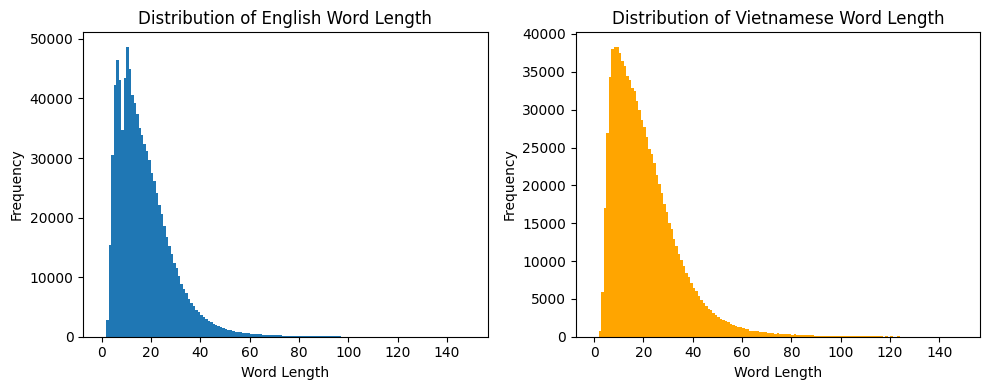

In [5]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

axes[0].hist(df['en_word_length'], bins=range(0, 150, 1))
axes[0].set_title('Distribution of English Word Length')
axes[0].set_xlabel('Word Length')
axes[0].set_ylabel('Frequency')

axes[1].hist(df['vi_word_length'], bins=range(0, 150, 1), color = 'orange')
axes[1].set_title('Distribution of Vietnamese Word Length')
axes[1].set_xlabel('Word Length')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [6]:
df['en_char_length']=df['en'].apply(len)
df['vi_char_length']=df['vi'].apply(len)

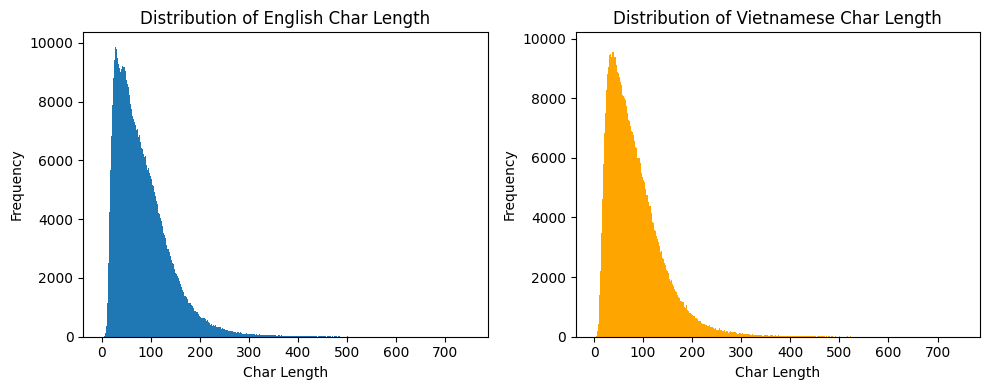

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

axes[0].hist(df['en_char_length'],bins=range(0, 750, 1))
axes[0].set_title('Distribution of English Char Length')
axes[0].set_xlabel('Char Length')
axes[0].set_ylabel('Frequency')

axes[1].hist(df['vi_char_length'],bins=range(0, 750, 1), color = 'orange')
axes[1].set_title('Distribution of Vietnamese Char Length')
axes[1].set_xlabel('Char Length')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

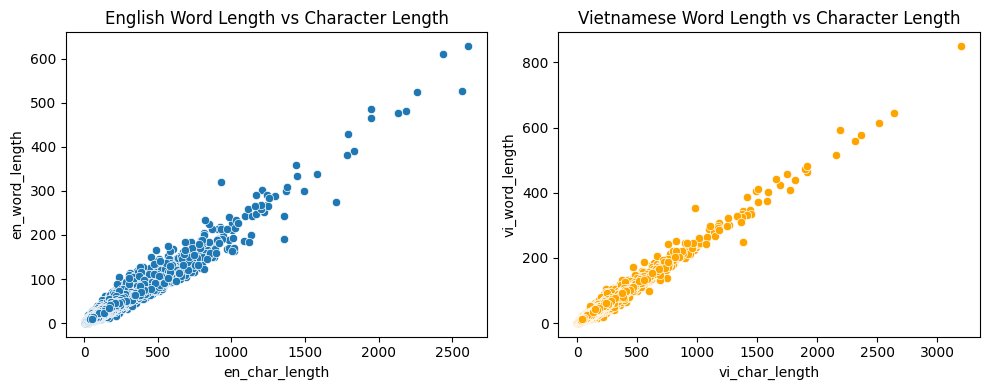

In [9]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

sns.scatterplot(x='en_char_length', y='en_word_length', data=df, ax=axes[0])
axes[0].set_title('English Word Length vs Character Length')

sns.scatterplot(x='vi_char_length', y='vi_word_length', data=df, ax=axes[1], color= 'orange')
axes[1].set_title('Vietnamese Word Length vs Character Length')

plt.tight_layout()
plt.show()

In [11]:
df['en_unique_word_count'] =df['en'].apply(lambda x: len(set(str(x).split())))
df['vi_unique_word_count'] =df['vi'].apply(lambda x: len(set(str(x).split())))

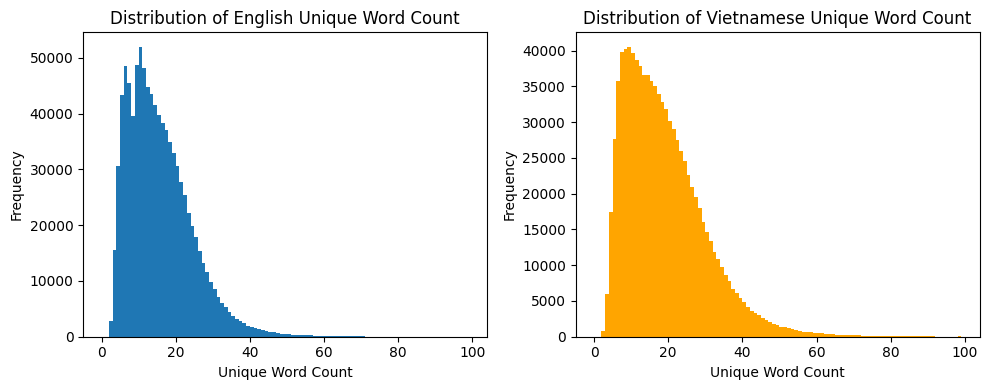

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

axes[0].hist(df['en_unique_word_count'],bins=range(0, 100, 1))
axes[0].set_title('Distribution of English Unique Word Count')
axes[0].set_xlabel('Unique Word Count')
axes[0].set_ylabel('Frequency')

axes[1].hist(df['vi_unique_word_count'], bins=range(0, 100, 1), color = 'orange')
axes[1].set_title('Distribution of Vietnamese Unique Word Count')
axes[1].set_xlabel('Unique Word Count')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

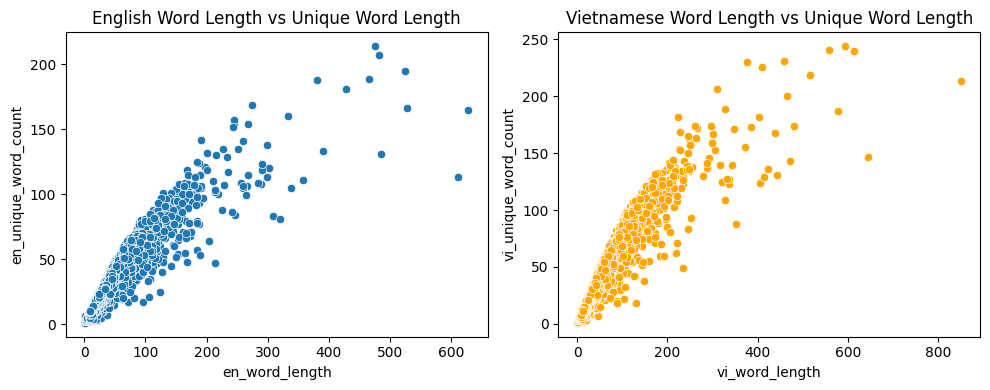

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

sns.scatterplot(x='en_word_length', y='en_unique_word_count', data=df, ax=axes[0])
axes[0].set_title('English Word Length vs Unique Word Length')

sns.scatterplot(x='vi_word_length', y='vi_unique_word_count', data=df, ax=axes[1], color= 'orange')
axes[1].set_title('Vietnamese Word Length vs Unique Word Length')

plt.tight_layout()
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_26588\2699745944.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


<AxesSubplot: >

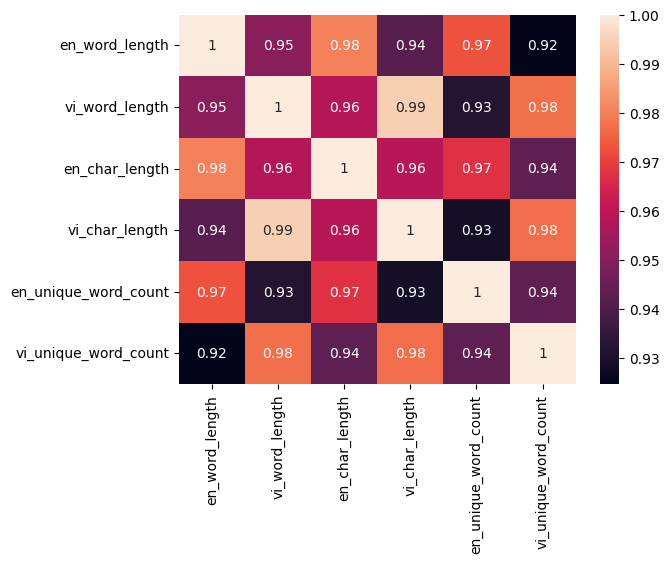

In [14]:
corr=df.corr()
sns.heatmap(corr,annot=True)

## Bi-gram

In [15]:

# Định nghĩa hàm để tạo bigram từ một câu
def create_bigrams(sentence):
    words = sentence.split()
    bigrams = [(words[i], words[i+1]) for i in range(len(words)-1)]
    return bigrams

# Áp dụng hàm create_bigrams vào cột 'sentence' và lưu kết quả vào cột mới 'bigrams'
df['en_bigrams'] = df['en'].apply(create_bigrams)
df['vi_bigrams'] = df['vi'].apply(create_bigrams)

In [16]:
df[['en','en_bigrams']].head()

,en,en_bigrams
0,How can I speak in 10 minutes about the bonds ...,"[(How, can), (can, I), (I, speak), (speak, in)..."
1,This is not a finished story .,"[(This, is), (is, not), (not, a), (a, finished..."
2,Imagine the first piece : a man burning his li...,"[(Imagine, the), (the, first), (first, piece),..."
3,"He is a poet , a playwright , a man whose whol...","[(He, is), (is, a), (a, poet), (poet, ,), (,, ..."
4,"Imagine him as the communists enter Saigon , c...","[(Imagine, him), (him, as), (as, the), (the, c..."


In [17]:
df[['vi','vi_bigrams']].head()

,vi,vi_bigrams
0,Làm sao tôi có thể trình bày trong 10 phút về ...,"[(Làm, sao), (sao, tôi), (tôi, có), (có, thể),..."
1,Câu chuyện này chưa kết thúc .,"[(Câu, chuyện), (chuyện, này), (này, chưa), (c..."
2,Hãy tưởng tượng mảnh đầu tiên : một người đàn ...,"[(Hãy, tưởng), (tưởng, tượng), (tượng, mảnh), ..."
3,"Ông là nhà thơ , nhà viết kịch , một người mà ...","[(Ông, là), (là, nhà), (nhà, thơ), (thơ, ,), (..."
4,"Hãy tưởng tượng ông , một người cộng sản tiến ...","[(Hãy, tưởng), (tưởng, tượng), (tượng, ông), (..."
